In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('Train_data_Bigmart.csv')
test = pd.read_csv('Test_data_Bigmart.csv')

In [3]:
train['source'] = 'train'
test['source'] = 'test'

In [7]:
data = pd.concat([train,test],ignore_index=True)
print(train.shape)
print(test.shape)
print(data.shape)

(8523, 13)
(5681, 12)
(14204, 13)


In [8]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [9]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [10]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 2
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [11]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']

In [13]:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [17]:
for col in categorical_columns:
    print('\nfreq of categories for variable %s'%col)
    print(data[col].value_counts())


freq of categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

freq of categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

freq of categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

freq of categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

freq of categories for variable Outlet_Type
Supermarket Type1    

In [28]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [36]:
from scipy.stats import mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [37]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [48]:
#data.loc[data['Item_Visibility'] == 0]
mean = data['Item_Visibility'].mean(skipna=True)
mean

0.06595278007399345

In [51]:
data.loc[data.Item_Visibility == 0, 'Item_Visibility'] = mean

In [54]:
data.loc[data['Item_Visibility'] == 0]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source


In [62]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x : x[0:2])

In [63]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR' : 'Drinks'})

In [65]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [67]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [68]:
data.loc[data['Item_Type_Combined'] == 'Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

In [71]:
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [74]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [76]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [77]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [78]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [79]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [80]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [97]:
#linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import cross_validation, metrics

In [86]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

In [90]:
alg = LinearRegression(normalize=True)

In [91]:
alg.fit(train[predictors], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [92]:
train_prediction = alg.predict(train[predictors])

In [100]:
cv_score = cross_validation. cross_val_score(alg, train[predictors], train[target], cv=20, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
cv_score

array([ 1212.09190739,  1114.34331541,  1135.10991012,  1144.28616377,
        1140.21608065,  1104.62785753,  1081.53290741,  1135.05010833,
        1127.98690379,  1107.88654117,  1084.04424827,  1131.80203976,
        1154.55283614,  1076.47684845,  1079.35209071,  1189.41947389,
        1191.60799664,  1082.3676913 ,  1208.29063235,  1077.46704661])

In [101]:
#print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train[target].values,train_prediction)))

RMSE: 1127.6246308


In [102]:
test[target] = alg.predict(test[predictors])

C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv('LinearAlog.csv', index=False)

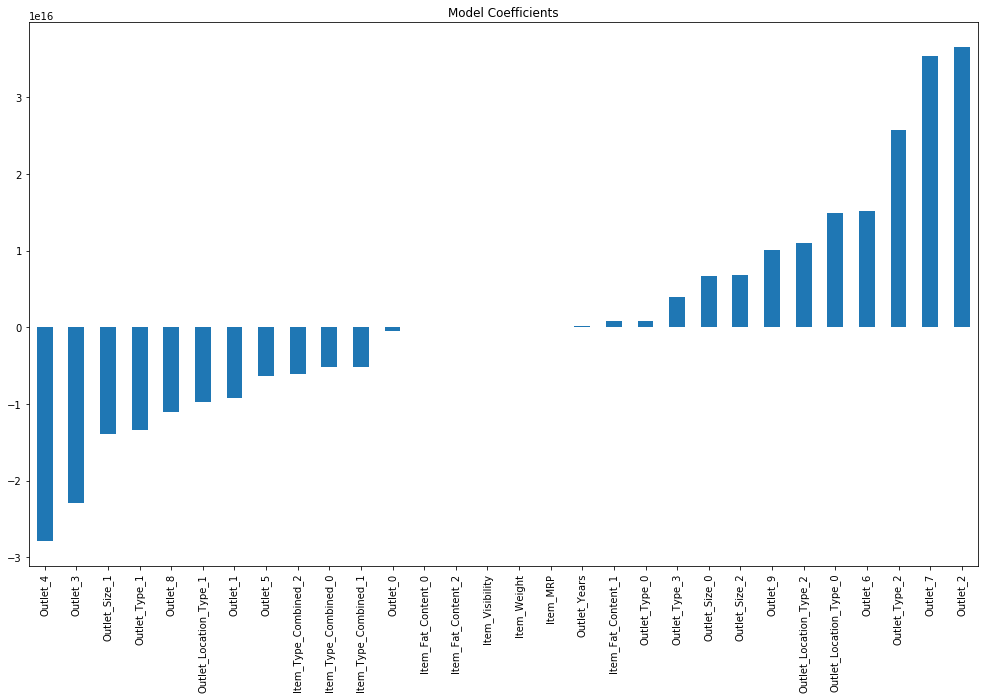

In [107]:
coef1 = pd.Series(alg.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(17,10))